# Abstract
In this blogpost, I am implementing the perceptron algorithm On both linearly divisible data and non-linearly divisible data. I am exploring what it means for an algorithm to learn optimal weights with a loss function and weight update. Finally, I am utilizing an outside dataset to understand how well a perceptron can perform on it.

perceptron.py link: https://github.com/Lia-Smith/github.io/blob/main/posts/perceptron-post/perceptron.py

In [2]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

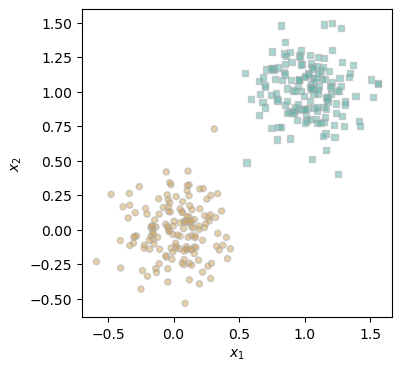

In [19]:
import torch
import pandas
from matplotlib import pyplot as plt

torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    
    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

In [20]:

# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

while loss > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

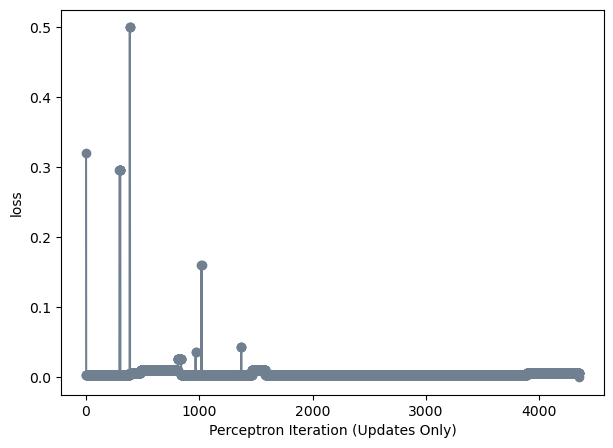

In [21]:
import matplotlib.pyplot as plt
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

The model converges on the linearly separable data, therefore we know that the perceptron algorithm is working!

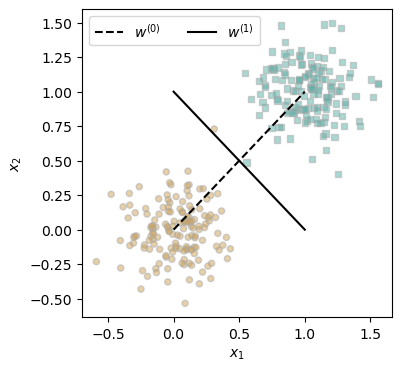

In [22]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_perceptron_data(X, y, ax)

w_0 = torch.Tensor([1, -1, 0])
w_1 = torch.Tensor([1,  1, -1]) 

draw_line(w_0, 0, 1, ax, color = "black", linestyle = "dashed", label = r"$w^{(0)}$")
draw_line(w_1, 0, 1, ax, color = "black", label = r"$w^{(1)}$")

l = ax.legend(ncol = 2)

## Experiment One:

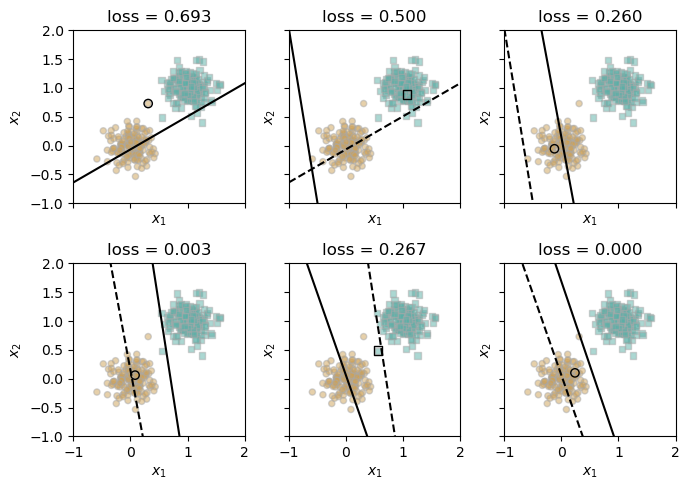

In [29]:
torch.manual_seed(1234567)

# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []

while loss > 0:
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    local_loss = p.loss(x_i, y_i).item()

    if local_loss > 0:
        opt.step(x_i, y_i)
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[2*(y[i].item())-1]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()

The following training demonstrates the slow convergence of the perceptron into a linear separation of the two classes. 

## Experiment Two:



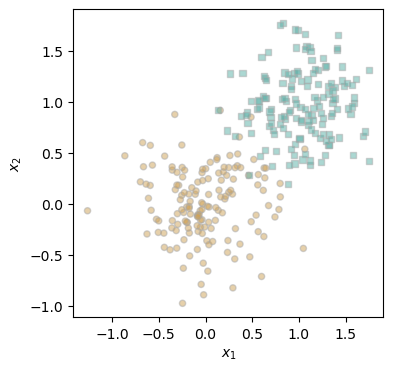

In [38]:
X, y = perceptron_data(n_points = 300, noise = .35)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_perceptron_data(X, y, ax)



166
332
498
664
830
996


IndexError: index 6 is out of bounds for axis 0 with size 6

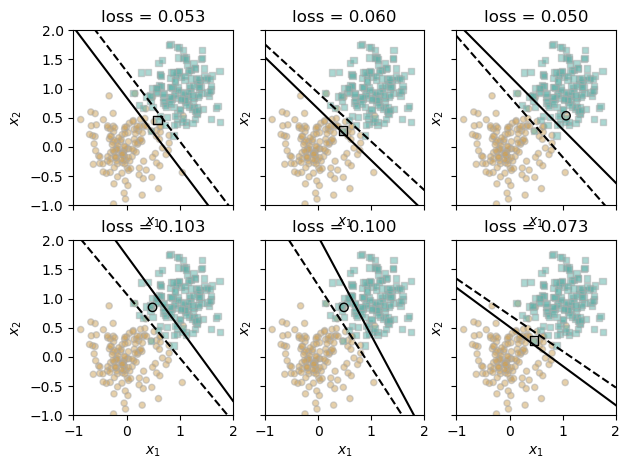

In [44]:
torch.manual_seed(1234567)

# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5)
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []
it = 0
while loss > 0 or it >=1001:
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 

    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    local_loss = p.loss(x_i, y_i).item()
    if local_loss > 0:
        it +=1
        opt.step(x_i, y_i)
    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0 and it%166==0:
        print(it)
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[i,0],X[i,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[2*(y[i].item())-1]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
plt.tight_layout()

## Experiment Three:


In [46]:
import pandas as pd
#reading in the data
breast_cancer = pd.read_csv("C:/Users/liapu/OneDrive/Desktop/Fall 2024/breast-cancer.csv")
breast_cancer.head()

#turning pd data frames into torch tensors
target = breast_cancer['diagnosis'].map({"M": 1, "B": 0})
data = breast_cancer.drop('diagnosis', axis = 1)
data = data.drop('id', axis = 1)

X = torch.tensor(data.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype = torch.float32)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
# Initialize
torch.manual_seed(1234567)
p = Perceptron()
opt = PerceptronOptimizer(p)
n = X.shape[0]

# Training loop parameters
max_steps = 1000
loss_vec = []
it = 0
loss = p.loss(X, y).item()

# Training loop
while loss > 0 and it < max_steps:
    i = torch.randint(n, size=(1,))
    x_i = X[[i], :]
    y_i = y[i]

    local_loss = p.loss(x_i, y_i).item()

    if local_loss > 0:
        opt.step(x_i, y_i)

    # Update total loss and iteration counter
    loss = p.loss(X, y).item()
    loss_vec.append(loss)
    it += 1

    # Print progress every 100 steps
    if it % 100 == 0:
        print(f"Step {it}: loss = {loss:.4f}")

# Final message
print(f"\nTraining completed in {it} steps with final loss = {loss:.4f}")


Step 100: loss = 0.3620
Step 200: loss = 0.3568
Step 300: loss = 0.3322
Step 400: loss = 0.1916
Step 500: loss = 0.3023
Step 600: loss = 0.6186
Step 700: loss = 0.0914
Step 800: loss = 0.1318
Step 900: loss = 0.4429
Step 1000: loss = 0.2127

Training completed in 1000 steps with final loss = 0.2127


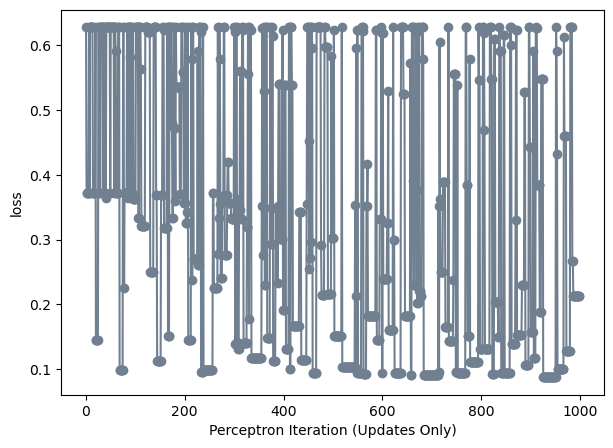

In [48]:
import matplotlib.pyplot as plt
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

I don't beleive this data is linearly separable, since it always seems to be occilating above .9, suggestting that .9 is the best we can do with this algorithm in terms of cross entropy loss. 

# conclusion: 
Hardly any real-life dataset is going to be linearly separable, however the perceptron provides a framework for more complicated machine learning models and tasks. Despite its simplicity, the perceptron can do pretty well on very specific datasets. 